In [1]:
import pandas as pd
import matplotlib as plt
import numpy as np
import scipy.misc as spm
import scipy.ndimage as ndi
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import BSpline
from scipy.spatial.distance import cdist
from sklearn import cluster
from skimage import color,io
from skimage.filters import threshold_otsu,threshold_multiotsu,prewitt,sobel
from skimage.data import camera
from skimage.util import compare_images
from PIL import Image
from skimage import data, img_as_float
from skimage import exposure
np.random.seed(0)

## 3a

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as pyplot

img = Image.open("./matlab.tif")
img.size

(2734, 2136)

## 3b

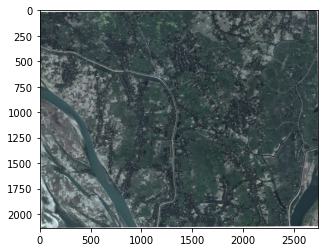

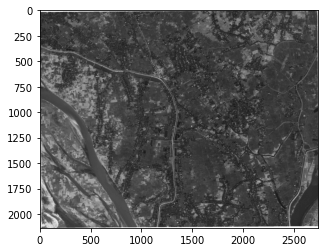

In [3]:
img.getdata()
r, g, b = img.split()

ra = np.array(r)
ga = np.array(g)
ba = np.array(b)

gray = (0.299*ra + 0.587*ga + 0.114*ba)

pyplot.figure()
pyplot.imshow(img)
pyplot.figure()
pyplot.imshow(gray, cmap="gray")

## 3c

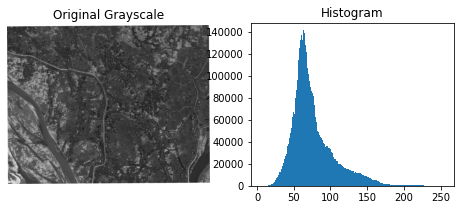

In [4]:
#3c output histogram of the grey image and show the results
fig, axes = plt.subplots(ncols=2, figsize=(8, 3))
ax = axes.ravel()
ax[0] = plt.subplot(1, 2, 1)
ax[1] = plt.subplot(1, 2, 2)

ax[0].imshow(gray, cmap=plt.cm.gray)
ax[0].set_title('Original Grayscale')
ax[0].axis('off')

plt.hist(gray.ravel(), bins=256)
ax[1].set_title('Histogram')
#ax[1].axvline(thresh, color='r')

plt.show()

Based on our output we can see that a majority of the pixels are darker and make up a majority of the image. That's why we can see a significant skew in the image to the left. we can see that there is different shades or darker pixels and vary in density compared to the white pixels. The tail of the distribution towards the right represents the lighter pixels which make up a much smaller portion of the image compared to the darker pixels. 

## 3e

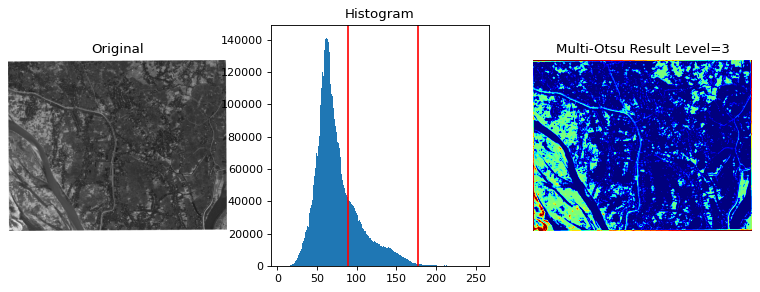

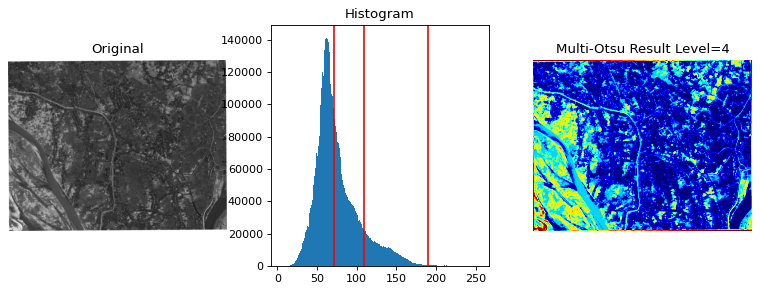

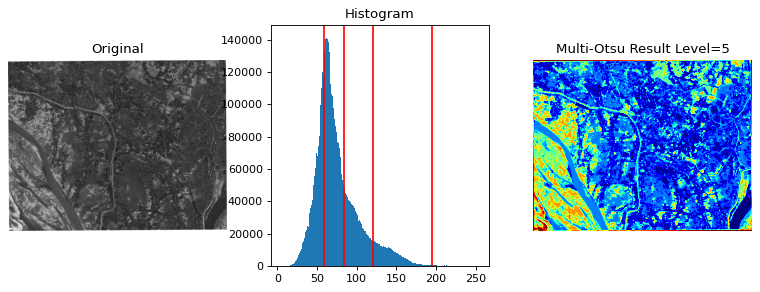

In [5]:

# Applying multi-Otsu threshold for the default value, generating
# three classes.
image = gray
for level in [3,4,5]:
    thresholds = threshold_multiotsu(image,classes=level)

    # Using the threshold values, we generate the three regions.
    regions = np.digitize(image, bins=thresholds)

    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4),dpi=80)
    fig = plt.figure(1, figsize=(14,12),dpi=80)
    # Plotting the original image
    ax[0].imshow(image, cmap='gray')
    ax[0].set_title('Original')
    ax[0].axis('off')

    # Plotting the histogram and the thresholds plotted on the histogram for multi-otsu
    ax[1].hist(image.ravel(), bins=255)
    ax[1].set_title('Histogram')
    for thresh in thresholds:
        ax[1].axvline(thresh, color='r')

    # Plotting the mutli-threshold result.
    ax[2].imshow(regions, cmap='jet')
    ax[2].set_title(f'Multi-Otsu Result Level={level}')
    ax[2].axis('off')

    plt.subplots_adjust()

    plt.show()

## 3f

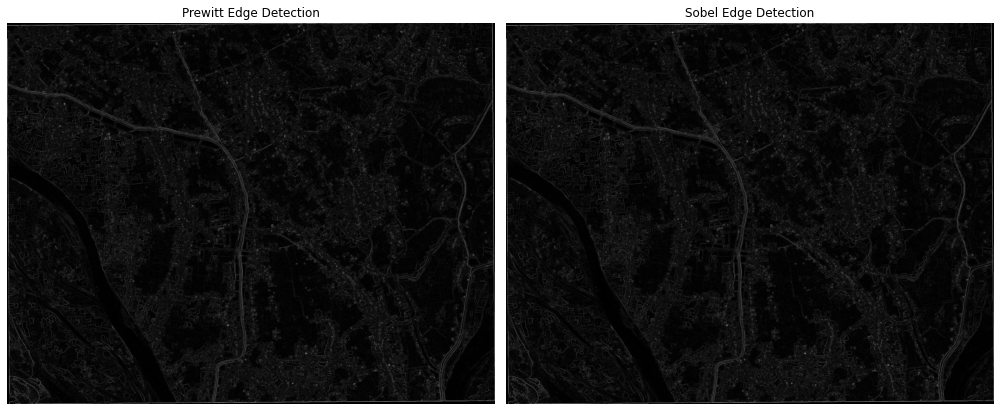

In [6]:
# %% EDGE DETECTION 
# * Sobel & Prewitt operators 

edge_prewitt = prewitt(image)
edge_sobel = sobel(image)

fig, axes = plt.subplots(ncols=2, sharex=True, sharey=True,
                         figsize=(14, 12))

axes[0].imshow(edge_prewitt, cmap=plt.cm.gray)
axes[0].set_title('Prewitt Edge Detection')

axes[1].imshow(edge_sobel, cmap=plt.cm.gray)
axes[1].set_title('Sobel Edge Detection')

for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

## 3g

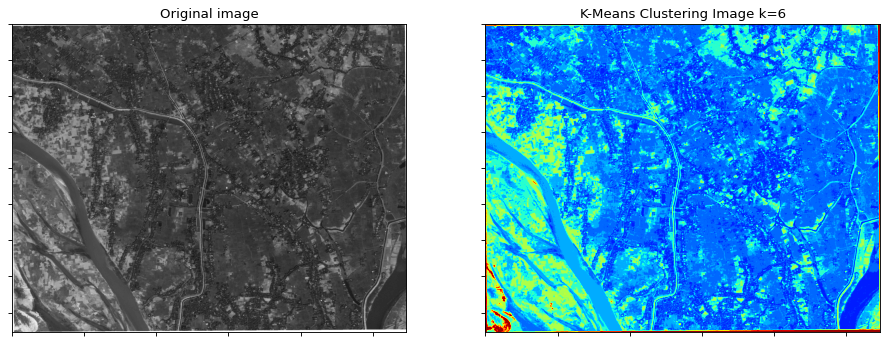

In [7]:

def kmeans_clustering(array, n_clusters):
    # Reshape the input array
    X = array.reshape((-1, 1))
    # Define the k-means clustering problem and specify the k or num of clusters
    k_m = cluster.KMeans(n_clusters=n_clusters, n_init=4)
    # Solve the k-means clustering problem
    k_m.fit(X)
    # Get the coordinates of the clusters centers
    values = k_m.cluster_centers_.squeeze()
    # Get the label of each point
    labels = k_m.labels_
    return(values, labels)

level= 6
# Group similar k clusters
values, labels = kmeans_clustering(image, n_clusters = level)
# Create the segmented array from labels and values
img_segmented = np.choose(labels, values)
# Reshape the array as the original image
img_segmented.shape = image.shape
# Get the values of min and max intensity in the original image
vmin = image.min()
vmax = image.max()
fig = plt.figure(1, figsize=(14,12),dpi=80)
# Plot the original image
ax1 = fig.add_subplot(1,2,1)
ax1.imshow(image,cmap=plt.cm.gray, vmin=vmin, vmax=vmax)
ax1.set_title('Original image')
# Plot the simplified color image
ax2 = fig.add_subplot(1,2,2)
ax2.imshow(img_segmented, cmap='jet', vmin=vmin, vmax=vmax)
ax2.set_title(f'K-Means Clustering Image k={level}')
# Get rid of the tick labels
ax1.set_xticklabels([])
ax1.set_yticklabels([])
ax2.set_xticklabels([])
ax2.set_yticklabels([])
plt.show()

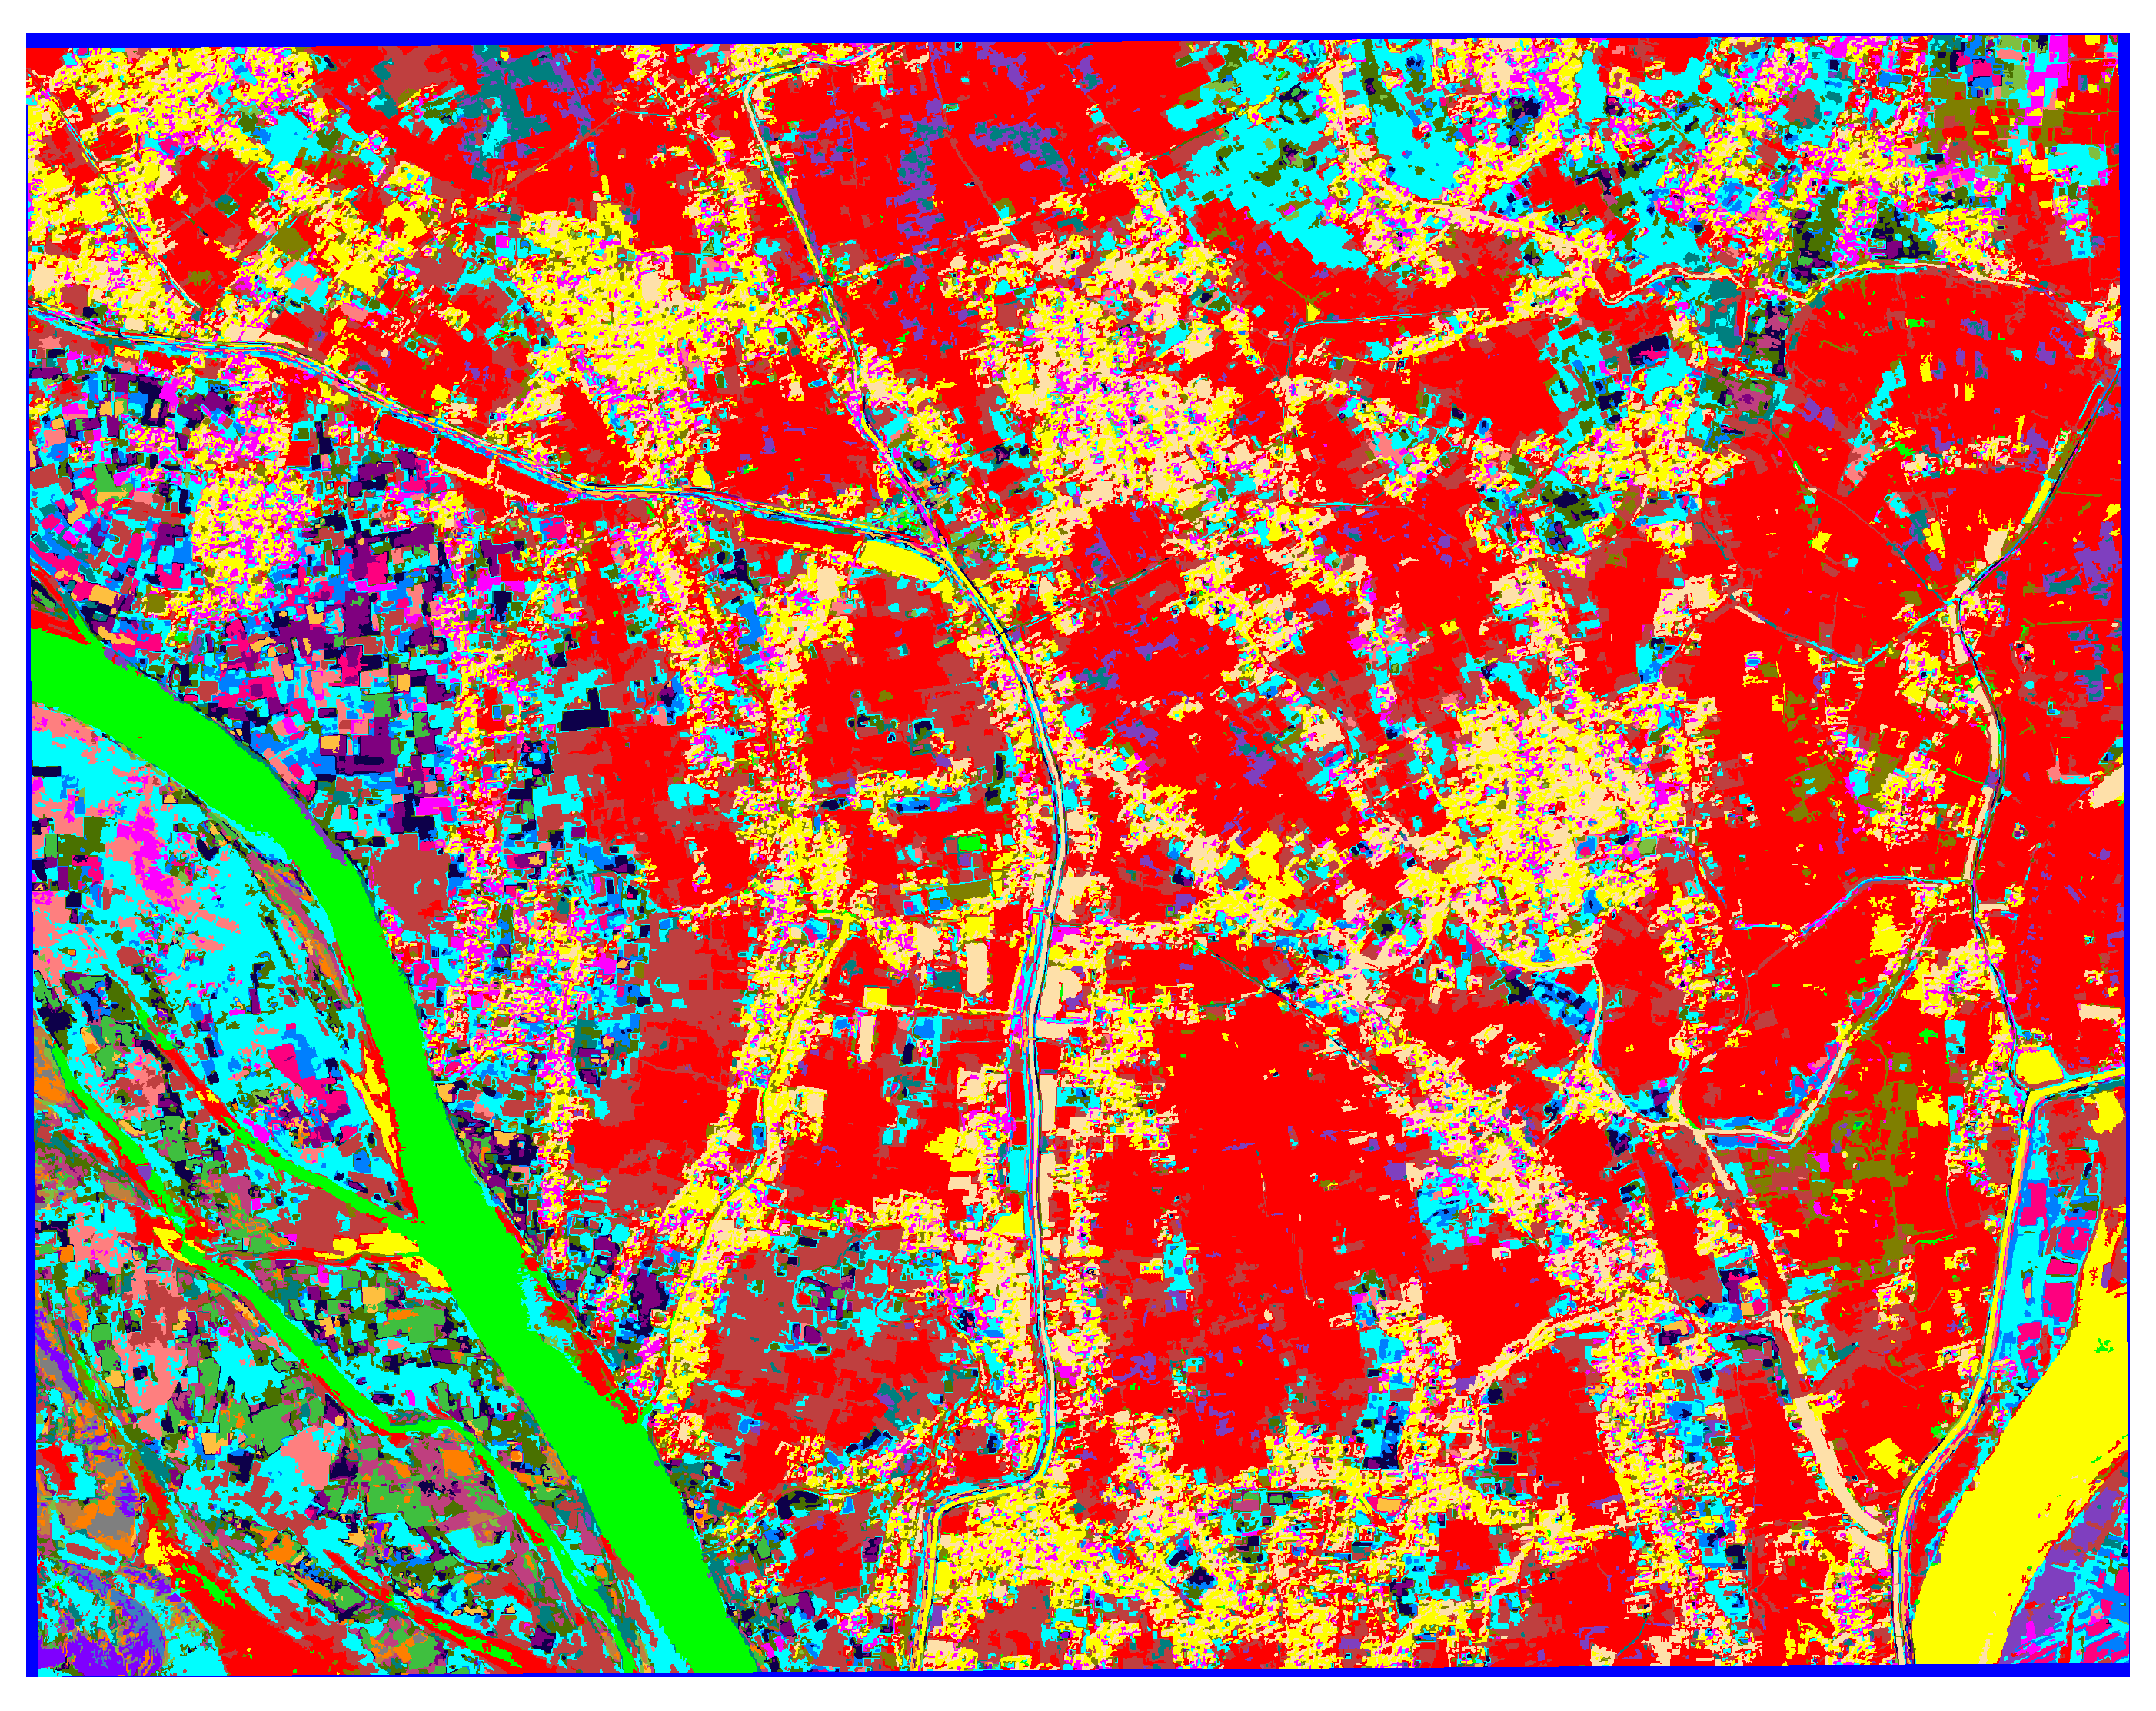

In [8]:
from PIL import Image
img_classified = Image.open("./matlab_classified.tif")
img_classified

## 3h

In [9]:
img_classified_array = np.array(img_classified)
img_reclassified_array= img_classified_array.copy()
np.unique(img_classified_array)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26], dtype=uint8)

In [10]:
mapping = [(0,0),(1,3),(3,0),(4,2),(5,3),(6,5),(7,2),(8,1),(9,1),(10,1),(11,3),(12,6),(13,1),(14,1),(15,5),(16,5),(17,5),(18,6),(19,3),(20,3),(21,1),(22,6),(23,4),(24,5),(25,3),(26,5)]

In [11]:
for classified_pixel, reclassified_pixel in mapping:
    img_reclassified_array[img_reclassified_array==classified_pixel]=reclassified_pixel

In [12]:
labels_copy = labels.copy()+1
labels_copy.size

5839824

In [13]:
#45:2180, 36:2769).
reference_image =  img_reclassified_array[44:2180,35:2769].ravel()
reference_image.size

5839824

## 3i

In [14]:
from sklearn.metrics import multilabel_confusion_matrix,accuracy_score

multilabel_confusion_matrix(reference_image, labels_copy.ravel())


array([[[3929375,       0],
        [1910449,       0]],

       [[3872083, 1349976],
        [ 537263,   80502]],

       [[4141834,  437049],
        [1260750,     191]],

       [[4687750,   97443],
        [1053816,     815]],

       [[4988343,  848479],
        [   3000,       2]],

       [[2918397, 2149337],
        [ 758940,   13150]],

       [[4756424,  862454],
        [ 220520,     426]]], dtype=int64)

In [15]:
accuracy = accuracy_score(reference_image,labels_copy)
accuracy

0.016282340015726503

## 3i

Based on results we see a very low accuracy, and we see the confusion matrix output for each label value. 

One thing to note is that our k-means cluster is not able to successfully account for noise so we're going to incorrectly classify noise pixels. However Across the other region we see that our accuracy actually performs reasonably well. Consider the matrix label 1: Urban

[[3872083, 1349976],
[ 537263,   80502]],

This actually provides an accuracy score of approximately 67%. Which is not that bad. 

So the model either needs to be able to account for noise, or eliminate it from accuracy scores / results. 

Another recommendation would be to increase the number of clusters, since a lot of these various regions have various color skeems where the color portion of the feature set could
have higher predictive power. Whereas with these reclassification we've over generalized too many categories.

A way we could improve this is by using a hyperameter tuning method like gridsearch to tune the number of k to include, and use cross-validation to find the k that performs optimally. 

With these recommendation we would likely see better results! 
